# Utilisation de Pandas 

## Lecture de fichiers tabulés

- Les **fichiers tabulés** sont des fichiers de type tableurs (e.g `Excel`, `Open Office`, ...)
- Les formats de fichiers sont de type:
    - propriétaires (xls, )
    - xml compressés ou pas (xlsx, open office ...)
    - texte (csv, tsv)
    - base de données relationnels `SQL` (ou pas `noSQL`)

## Travailler avec les données
- Obtenir les données 
- Normaliser les données (données manquantes, ...)
- Transformer les données brutes en format standard (csv, xml, json, ...)
- Combiner, agréger, grouper les données
- Pivoter les données

## Quelques bases

Les données de base en pandas sont les `dataframes` et les `series`. 
Il faut voir les premiers comme des tableaux de colonnes et les derniers comme des vecteurs colonnes dont les lignes et les colonnes sont **indexés**. 
Cette indexation facilite la manipulation des données et leur aggregation. 


![dataframe](../imgs/01_table_dataframe.svg) ![dataframe](../imgs/01_table_series.svg)


In [1]:
import pandas as pd
df_jouet  = pd.DataFrame(
    {
        'Nom': ['Luke', 'Obiwan', 'Han'],
        'personnage': ['Jedi', 'Jedi', 'Contrebandier'],
        'age' : [20, 60, 35]
    }
)

In [2]:
df_jouet

,Nom,personnage,age
0,Luke,Jedi,20
1,Obiwan,Jedi,60
2,Han,Contrebandier,35


### Les index

Dans l'exemple précédent, les noms de colonnes représentent les **index de colonnes**, les valeurs 0 à 2 représentent les **index de lignes**.

In [3]:
print(df_jouet.columns)

Index(['Nom', 'personnage', 'age'], dtype='object')


In [4]:
print(df_jouet.index)

RangeIndex(start=0, stop=3, step=1)


### Accèder aux données
On accède aux données des dataframes ou des series par leur index ou les indices de lignes et colonnes. 

Il existe plusieurs façon de réaliser ces opérations.

#### .iloc

In [8]:
df_jouet.iloc[1]

Nom           Obiwan
personnage      Jedi
age               60
Name: 1, dtype: object

In [6]:
print(df_jouet.iloc[1,0])

Obiwan


#### .loc

In [9]:
df_jouet.loc[1]

Nom           Obiwan
personnage      Jedi
age               60
Name: 1, dtype: object

In [10]:
print(df_jouet.loc[1,'Nom'])

Obiwan


<p class='alert alert-info'>Notez bien l'<b>indice de ligne est numérique</b> pour l'attribut <b>.loc</b></p>

On peut aussi utiliser une des colonnes comme index de ligne

In [11]:
df_jouet

,Nom,personnage,age
0,Luke,Jedi,20
1,Obiwan,Jedi,60
2,Han,Contrebandier,35


In [13]:
tmp = df_jouet.set_index('Nom')
tmp.loc['Obiwan','age']

60

In [15]:
df_jouet.set_index('Nom')
df_jouet

,Nom,personnage,age
0,Luke,Jedi,20
1,Obiwan,Jedi,60
2,Han,Contrebandier,35


Dans ce cas, on peut l'accès est identique mais l'indice de ligne est nommé.

In [10]:
print(df_jouet.set_index('Nom').loc['Obiwan', 'age'])

60


## Travaux pratiques


Dans ce premier TP, nous allons utiliser `pandas` pour ouvrir un fichier excel utilisé pour stocker les contrôles de qualité quotidiens du débit de référence d'un accélérateur de particule.

Le fichier `CQ_top.xlsx` se trouve dans le répértoire `data` de ce même répertoire.

Il contient 5 feuilles de travail dont une (*Suivi_quotidien*) contient les données que nous allons analysées.

### Ouverture du fichier

In [16]:
# importer pandas dans l'espace de nommage
# votre code ici
import pandas as pd
pd.set_option('display.max_columns', 30)
fichier_top = '../data/CQ_top.xlsx'

Consulter [l'aide en ligne de la fonction](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) `read_excel` pour connaître les différentes options possibles pour lire un fichier excel, notamment celle permettant de lire spécifiquement une feuille plutôt qu'une autre (`sheet_name`).

Affecter la sortie de la fonction à une variable `df` par exemple.

In [17]:
# lecture de la feuille Suivi_Quotidien du fichier excel CQ_top.xlsx
# df =  votre code ici
df = pd.read_excel(fichier_top, engine='openpyxl', 
                   sheet_name='Suivi_Quotidien', header=[0])

Le retour de la fonction est un  `DataFrame` pandas.


### Description simples des données


Nous allons utilisé dans un premier temps des méthodes basiques pour avoir un apercu des données.
- .shape
- .head() 
- .info()
- .describe()



#### shape
L'attribut shape retourne le nombre de lignes et de colonnes sous forme d'un tuple.

In [15]:
df.shape

(1093, 30)

#### head()
Cette méthode permet d'afficher par défaut les 5 premières lignes d'un dataframe.

In [16]:
# utiliser la méthode .head() du dataframe df
df.head()

,DATE,Opé.,Temp (°C),Pression (hPa),"KT,P",X6,Unnamed: 6,Unnamed: 7,Unnamed: 8,X23,Unnamed: 10,Unnamed: 11,Unnamed: 12,e6,Unnamed: 14,Unnamed: 15,Unnamed: 16,e9,Unnamed: 18,Unnamed: 19,Unnamed: 20,e12,Unnamed: 22,Unnamed: 23,Unnamed: 24,e15,Unnamed: 26,Unnamed: 27,Unnamed: 28,Commentaire
0,NaT,NaN,NaN,NaN,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,NaN
1,2016-12-02,CG,22,1020,1.00016,**,1.581,-0.005035,0.503461,**,1.917,0.005244,0.524384,**,1.978873,-0.010564,1.056372,**,2.008368,0.004184,0.418406,**,1.997744,-0.001128,0.112805,**,1.999353,-0.000324,0.032375,CQ Mensuel Nouvelles REF
2,2016-12-05,DAP,24,1017,1.009907,**,1.594026,0.003163,0.316288,**,1.93335,0.013818,1.381769,**,2.014423,0.007211,0.721143,**,2.025663,0.012832,1.283160,**,**,**,NaN,**,**,**,NaN,**
3,2016-12-06,AP,24.2,1025,1.002699,**,1.586789,-0.001391,0.139137,**,1.925921,0.009922,0.992210,**,**,**,NaN,**,**,**,NaN,**,2.013303,0.006651,0.665149,**,2.016074,0.008037,0.803707,**
4,2016-12-07,JD,24,1028,0.999101,**,1.585219,-0.002379,0.237927,**,1.924779,0.009323,0.932310,**,2.016428,0.008214,0.821409,**,2.023149,0.011574,1.157428,**,**,**,NaN,**,**,**,NaN,**


Grâce à la fonction `.head()`, on s'aperçoit que les lignes 1 et 2 du tableau sont des lignes d'en-têtes.

On va nettoyer le tableau plus loin dans le TD.

#### tail()
tail est la méthode pendante à la fonction head() mais pour la fin du dataframe.

#### info()

La fonction `.info()` donne des informations sur le type des valeurs contenues dans les colonnes du tableau 

In [17]:
# utiliser la méthode `.info()` sur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1092 non-null   datetime64[ns]
 1   Opé.            1092 non-null   object        
 2   Temp (°C)       1092 non-null   object        
 3   Pression (hPa)  1092 non-null   object        
 4   KT,P            1091 non-null   object        
 5   X6              1093 non-null   object        
 6   Unnamed: 6      1093 non-null   object        
 7   Unnamed: 7      1093 non-null   object        
 8   Unnamed: 8      1075 non-null   float64       
 9   X23             1093 non-null   object        
 10  Unnamed: 10     1093 non-null   object        
 11  Unnamed: 11     1093 non-null   object        
 12  Unnamed: 12     1076 non-null   float64       
 13  e6              1093 non-null   object        
 14  Unnamed: 14     1093 non-null   object        
 15  Unna

Les types `datetime64[ns]`, `float64` représentent des valeurs de date et  réelles respectivement. Le type `object` représente un type `string` dans la librairie pandas.

- Combien de lignes (nombre d'entrées) ?
- Combien de colonnes sont-elles catégorisées en `string` ?

Lorsque les données sont numériques, la méthode `.describe()` donne des informations descriptives de la répartition des données pour ces données.

In [18]:
#utiliser la méthode .describe()
df.describe()

,Unnamed: 8,Unnamed: 12,Unnamed: 16,Unnamed: 20,Unnamed: 24,Unnamed: 28
count,1075.000000,1076.000000,582.000000,581.000000,552.000000,554.000000
mean,0.504678,0.713528,0.617779,0.651358,0.518033,0.527169
std,0.443992,0.514685,0.458167,0.474927,0.374107,0.388007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.156700,0.272576,0.249476,0.252142,0.225618,0.200792
50%,0.349177,0.609226,0.531911,0.567790,0.460592,0.450951
75%,0.762789,1.105643,0.866912,0.945287,0.742479,0.773317
max,2.346586,2.203953,2.367168,2.329924,2.211086,1.768229


On observe bien que seulement 6 colonnes contiennent des valeurs numériques dans le dataframe df.

### Premières modifications du tableau

Vous vous êtes apercu que l'en-tête des colonnes n'était pas satisfaisant car des colonnes présentaient un nommage par défaut `Unnamed:x`. En effet, dans le fichier original, l'en-tête est placée sur 2 lignes.

Pandas offre la possibilité d'intégrer **plusieurs lignes pour un en-tête** (cf. le mot-clé `header` de la méthode `read_excel`).

```python
df = pd.read_excel('../data/CQ_top.xlsx', engine='openpyxl', sheet_name='Suivi_Quotidien', header=[0, 1])
```

In [19]:
# df_photons = votre code ici
df_photons = pd.read_excel(fichier_top, engine='openpyxl', 
                           sheet_name='Suivi_Quotidien', 
                           usecols="A:E,G,K")

In [20]:
df_photons.head()

,DATE,Opé.,Temp (°C),Pression (hPa),"KT,P",Unnamed: 6,Unnamed: 10
0,NaT,NaN,NaN,NaN,NaN,Dmes (Gy),Dmes (Gy)
1,2016-12-02,CG,22,1020,1.00016,1.581,1.917
2,2016-12-05,DAP,24,1017,1.009907,1.594026,1.93335
3,2016-12-06,AP,24.2,1025,1.002699,1.586789,1.925921
4,2016-12-07,JD,24,1028,0.999101,1.585219,1.924779


#### Exercice
- Utiliser la fonction .head() pour vérifier que les colonnes sélectionnées correspondent à votre choix.

In [21]:
df.head()

,DATE,Opé.,Temp (°C),Pression (hPa),"KT,P",X6,Unnamed: 6,Unnamed: 7,Unnamed: 8,X23,Unnamed: 10,Unnamed: 11,Unnamed: 12,e6,Unnamed: 14,Unnamed: 15,Unnamed: 16,e9,Unnamed: 18,Unnamed: 19,Unnamed: 20,e12,Unnamed: 22,Unnamed: 23,Unnamed: 24,e15,Unnamed: 26,Unnamed: 27,Unnamed: 28,Commentaire
0,NaT,NaN,NaN,NaN,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,Charge (nC),Dmes (Gy),Ecart,NaN,NaN
1,2016-12-02,CG,22,1020,1.00016,**,1.581,-0.005035,0.503461,**,1.917,0.005244,0.524384,**,1.978873,-0.010564,1.056372,**,2.008368,0.004184,0.418406,**,1.997744,-0.001128,0.112805,**,1.999353,-0.000324,0.032375,CQ Mensuel Nouvelles REF
2,2016-12-05,DAP,24,1017,1.009907,**,1.594026,0.003163,0.316288,**,1.93335,0.013818,1.381769,**,2.014423,0.007211,0.721143,**,2.025663,0.012832,1.283160,**,**,**,NaN,**,**,**,NaN,**
3,2016-12-06,AP,24.2,1025,1.002699,**,1.586789,-0.001391,0.139137,**,1.925921,0.009922,0.992210,**,**,**,NaN,**,**,**,NaN,**,2.013303,0.006651,0.665149,**,2.016074,0.008037,0.803707,**
4,2016-12-07,JD,24,1028,0.999101,**,1.585219,-0.002379,0.237927,**,1.924779,0.009323,0.932310,**,2.016428,0.008214,0.821409,**,2.023149,0.011574,1.157428,**,**,**,NaN,**,**,**,NaN,**


En analysant les 2 premières lignes, on s'aperçoit que 3 colonnes **Unnamed qui se suivent** contiennent la mesure en Gy, l'écart par rapport à la valeur attendu et la même valeur x 100 pour respectivement les énergies X6, X23, E6, E9, E12 et E15.

Autrement dit, les colonnes Unnamed 8, Unnamed 12, Unnamed 16, Unnamed 20, Unnamed 24 et Unnamed 28 ne servent pas.


#### Exercices:
- Créer une liste de valeurs qui contiennent les noms de colonnes à supprimer
    - ['Unnamed: 8', ..., 'Unnamed: 28']

<span class='alert alert-info'>Vous pouvez vous servir de vos connaissance acquises sur les compréhensions de listes</span>

On observe aussi que les colonnes nommés X6, X23, e6, e9, e12, e15 contiennent des '*' qui n'ont pas de significations particulières. On peut aussi les supprimer.
- Créer une seconde liste qui contiennent les noms des colonnes
    - X6, X23, e6, e9, e12, e15

<span class='alert alert-info'>Vous pouvez vous servir de vos connaissance acquises sur les expressions régulières</span>

- Ajouter les élements de la seconde liste à la première liste

In [23]:
del_cols = [f'Unnamed: {i}' for i in range(8, 32, 4)]

In [24]:
import re
del_cols += [col for col in df.columns if re.match('\w\d+', col)]

### drop()

La méthode `drop()` permet de supprimer des lignes et des colonnes en passant en paramètre les indices de lignes ou de colonnes. 

La sortie de la méthode est un autre dataframe. On peut aussi utiliser le argument `inplace=True` pour effecuter la modification du dataframe sur place.

Utilisons la liste de colonnes à supprimer avec cette méthode. 

In [45]:
df = df.drop(del_cols, axis=1)

In [46]:
df.head(2)

,DATE,Opé.,Temp (°C),Pression (hPa),"KT,P",Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 11,Unnamed: 14,Unnamed: 15,Unnamed: 18,Unnamed: 19,Unnamed: 22,Unnamed: 23,Unnamed: 26,Unnamed: 27,Commentaire
0,NaT,NaN,NaN,NaN,NaN,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,NaN
1,2016-12-02,CG,22,1020,1.00016,1.581,-0.005035,1.917,0.005244,1.978873,-0.010564,2.008368,0.004184,1.997744,-0.001128,1.999353,-0.000324,CQ Mensuel Nouvelles REF


### rename()
La méthode `rename()` permet de renommer soit les noms d'indices de colonnes ou de lignes.

#### Exercice
- Renommer la colonne `Opé.` en `Opérateur`

In [47]:
df = df.rename(columns={"Opé.":"Operateur"})

In [36]:
df.loc[0]

DATE                    NaT
Operateur               NaN
Temp (°C)               NaN
Pression (hPa)          NaN
KT,P                    NaN
Unnamed: 6        Dmes (Gy)
Unnamed: 7            Ecart
Unnamed: 10       Dmes (Gy)
Unnamed: 11           Ecart
Unnamed: 14       Dmes (Gy)
Unnamed: 15           Ecart
Unnamed: 18       Dmes (Gy)
Unnamed: 19           Ecart
Unnamed: 22       Dmes (Gy)
Unnamed: 23           Ecart
Unnamed: 26       Dmes (Gy)
Unnamed: 27           Ecart
Commentaire             NaN
Name: 0, dtype: object

#### Exercice
On observe que les colonnes `Unnamed: 6` à `Unnamed: 27` contiennent alternativement la dose mesurée en Gy et l'écart par rapport à la mesure attendue pour les énergies X6, X23, e6, e9, e12, e15.

Nous allons renommer les colonnes `Unnamed: 6` à `Unnamed: 27` pour qu'elles contiennent les bons identifiants. 

On peut remarquer que la première ligne du dataframe contient les identifiants sans les energies

- Créer une liste à partir des noms de colonnes du dataframe contenant `Unnamed: xx`
- Créer une nouvelle liste qui contienne `Dmes_(Gy)` et `Ecart` pour les énergies X6, X23, e6, e9, e12, e15.
    - Vous pourriez utiliser les informations de la première ligne du dataframe (optionnel)
- Créer un dictionnaire qui contiennent comme clé le nom de     
- Renommer les noms des colonnes en utilisant la méthode `rename()`
    - Utiliser un dictionnaire {'ancien_nom': 'nouveau_nom', }

In [40]:
l1 = [i for i in ['X6', 'X23', 'E6', 'E9', 'E12', 'E15'] for _ in range(2)]
l2 = df.iloc[0,5:-1].to_list()

In [49]:
{k:v for k,v in zip(df.columns, new_cols)}

{'DATE': 'DATE',
 'Operateur': 'Operateur',
 'Temp (°C)': 'Temp (°C)',
 'Pression (hPa)': 'Pression (hPa)',
 'KT,P': 'KT,P',
 'Unnamed: 6': 'X6_Dmes (Gy)',
 'Unnamed: 7': 'X6_Ecart',
 'Unnamed: 10': 'X23_Dmes (Gy)',
 'Unnamed: 11': 'X23_Ecart',
 'Unnamed: 14': 'E6_Dmes (Gy)',
 'Unnamed: 15': 'E6_Ecart',
 'Unnamed: 18': 'E9_Dmes (Gy)',
 'Unnamed: 19': 'E9_Ecart',
 'Unnamed: 22': 'E12_Dmes (Gy)',
 'Unnamed: 23': 'E12_Ecart',
 'Unnamed: 26': 'E15_Dmes (Gy)',
 'Unnamed: 27': 'E15_Ecart',
 'Commentaire': 'Commentaire'}

In [48]:
l1 = [i for i in ['X6', 'X23', 'E6', 'E9', 'E12', 'E15'] for _ in range(2)]
l2 = df.iloc[0,5:-1].to_list()
new_cols = list(df.columns)
new_cols[5:-1] = [f'{e1}_{e2}' for e1, e2 in zip(l1, l2)]

In [54]:
df = (df
        .rename(columns={k:v for k,v in zip(df.columns,
                                            new_cols)})
     )

Il est souvent préférable d'utiliser des **espaces** dans les noms des colonnes ou des index de lignes.
On va supprimer ces espaces.

In [57]:
df.head()

,DATE,Operateur,Temp (°C),Pression (hPa),"KT,P",X6_Dmes (Gy),X6_Ecart,X23_Dmes (Gy),X23_Ecart,E6_Dmes (Gy),E6_Ecart,E9_Dmes (Gy),E9_Ecart,E12_Dmes (Gy),E12_Ecart,E15_Dmes (Gy),E15_Ecart,Commentaire
0,NaT,NaN,NaN,NaN,NaN,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,Dmes (Gy),Ecart,NaN
1,2016-12-02,CG,22,1020,1.00016,1.581,-0.005035,1.917,0.005244,1.978873,-0.010564,2.008368,0.004184,1.997744,-0.001128,1.999353,-0.000324,CQ Mensuel Nouvelles REF
2,2016-12-05,DAP,24,1017,1.009907,1.594026,0.003163,1.93335,0.013818,2.014423,0.007211,2.025663,0.012832,**,**,**,**,**
3,2016-12-06,AP,24.2,1025,1.002699,1.586789,-0.001391,1.925921,0.009922,**,**,**,**,2.013303,0.006651,2.016074,0.008037,**
4,2016-12-07,JD,24,1028,0.999101,1.585219,-0.002379,1.924779,0.009323,2.016428,0.008214,2.023149,0.011574,**,**,**,**,**


#### Exercice
- Utiliser les méthodes [.str.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) des dataframes pour supprimer ces espaces

In [58]:
# votre code ici
df.columns = df.columns.str.replace(' ', '')

Supprimons la ligne d'indice 0 qui ne sert plus à rien en utilisant la méthode `.drop()`.

In [59]:
df = df.drop(0)

Dans le dataframe, on observe de nombreuses valeurs *NaN* (Not a Number). Pandas dispose d'une méthode très pratique pour supprimer ces valeurs `.dropna()`

In [60]:
df.head()

,DATE,Operateur,Temp(°C),Pression(hPa),"KT,P",X6_Dmes(Gy),X6_Ecart,X23_Dmes(Gy),X23_Ecart,E6_Dmes(Gy),E6_Ecart,E9_Dmes(Gy),E9_Ecart,E12_Dmes(Gy),E12_Ecart,E15_Dmes(Gy),E15_Ecart,Commentaire
1,2016-12-02,CG,22,1020,1.00016,1.581,-0.005035,1.917,0.005244,1.978873,-0.010564,2.008368,0.004184,1.997744,-0.001128,1.999353,-0.000324,CQ Mensuel Nouvelles REF
2,2016-12-05,DAP,24,1017,1.009907,1.594026,0.003163,1.93335,0.013818,2.014423,0.007211,2.025663,0.012832,**,**,**,**,**
3,2016-12-06,AP,24.2,1025,1.002699,1.586789,-0.001391,1.925921,0.009922,**,**,**,**,2.013303,0.006651,2.016074,0.008037,**
4,2016-12-07,JD,24,1028,0.999101,1.585219,-0.002379,1.924779,0.009323,2.016428,0.008214,2.023149,0.011574,**,**,**,**,**
5,2016-12-08,YS,24,1028,0.999101,1.587577,-0.000896,1.925356,0.009626,**,**,**,**,2.006077,0.003039,2.009893,0.004947,**


### replace()
La fonction `.replace` permet de substituer des valeurs sur place.

On observe que dans le dataframe, il y a des cellules qui contiennent une ou deux `*`. 
On va les remplacer avec la méthode `replace` par une valeur NAN.

#### Exercice
- importer la libraire numpy
- Utiliser la méthode replace en utilisant **une regex**

In [61]:
import numpy as np
df = df.replace(to_replace='\*{1,2}', value=np.nan, regex=True)

### Description des données

Pour une description statistique des données, une fonction `describe`

In [ ]:
df.copy

In [67]:
clean_df_photon = df.copy()
clean_df_photon.describe() 

,Temp(°C),Pression(hPa),"KT,P",X6_Dmes(Gy),X6_Ecart,X23_Dmes(Gy),X23_Ecart,E6_Dmes(Gy),E6_Ecart,E9_Dmes(Gy),E9_Ecart,E12_Dmes(Gy),E12_Ecart,E15_Dmes(Gy),E15_Ecart,my_ktp
count,1078.000000,1079.000000,1077.000000,1075.000000,1075.000000,1076.000000,1076.000000,582.000000,582.000000,581.000000,581.000000,549.000000,552.000000,551.000000,554.000000,1078.000000
mean,23.231447,1013.942632,1.010426,1.585679,-0.002090,1.899048,-0.004170,1.999442,-0.000259,1.998915,-0.000544,1.994714,-0.002628,1.997627,-0.001180,1.010437
std,0.946176,9.944799,0.010440,0.010154,0.006390,0.014777,0.007749,0.015411,0.007691,0.016095,0.008047,0.011680,0.005827,0.012918,0.006442,0.010443
min,20.600000,966.000000,0.981591,1.555125,-0.021318,1.865228,-0.021905,1.952657,-0.023672,1.955466,-0.022267,1.963241,-0.018380,1.964635,-0.017682,0.981591
25%,22.600000,1009.000000,1.003548,1.579542,-0.005952,1.889760,-0.009040,1.990186,-0.004854,1.988225,-0.005887,1.986956,-0.006519,1.988790,-0.005586,1.003562
50%,23.000000,1014.500000,1.009701,1.586707,-0.001443,1.898384,-0.004518,2.001069,0.000534,1.999270,-0.000365,1.993942,-0.003021,1.996900,-0.001545,1.009735
75%,23.800000,1020.000000,1.016726,1.591706,0.001703,1.906228,-0.000405,2.010947,0.005473,2.010823,0.005412,2.002036,0.000990,2.005496,0.002709,1.016755
max,27.800000,1040.000000,1.059647,1.626287,0.023466,1.949029,0.022040,2.046514,0.023257,2.046598,0.023299,2.044222,0.022111,2.035161,0.017580,1.059647


## Opérations vectorisées sur les lignes et colonnes du DataFrame

Il est souvent intéressant de créer de nouvelles données à partir d'autres données présentes dans le `DataFrame`. 

Dans l'exemple suivant, on crée une nouvelle colonne qui contient la valeur du coefficient $k_{t,p}$ (déjà calculé dans le colonne `KT,P mais c'est pour l'exemple).

In [64]:
%%timeit
clean_df_photon['my_ktp'] = ((273.15+clean_df_photon['Temp(°C)']) * 1013.25) / (clean_df_photon['Pression(hPa)'] * (273.15+20))
#clean_df_photon.iloc[10:15]

228 µs ± 883 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Une autre manière de procéder est de définir et d'utiliser une fonction que l'on passe en paramètre à la méthode `.apply()` du DataFrame. 

In [68]:
def ktp(row):
    t = row['Temp(°C)']+273.15
    p = row['Pression(hPa)']
    return (1013.25*t)/(p*293.15)
%timeit clean_df_photon.apply(ktp, axis=1)#.iloc[10:15]

6.91 ms ± 65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%%timeit
clean_df_photon.assign(my_ktp=lambda _df: ((273.15+_df['Temp(°C)']) * 1013.25) / (_df['Pression(hPa)'] * (273.15+20)))

349 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [70]:
clean_df_photon.head()

,DATE,Operateur,Temp(°C),Pression(hPa),"KT,P",X6_Dmes(Gy),X6_Ecart,X23_Dmes(Gy),X23_Ecart,E6_Dmes(Gy),E6_Ecart,E9_Dmes(Gy),E9_Ecart,E12_Dmes(Gy),E12_Ecart,E15_Dmes(Gy),E15_Ecart,Commentaire,my_ktp
1,2016-12-02,CG,22.0,1020.0,1.000160,1.581000,-0.005035,1.917000,0.005244,1.978873,-0.010564,2.008368,0.004184,1.997744,-0.001128,1.999353,-0.000324,CQ Mensuel Nouvelles REF,1.000160
2,2016-12-05,DAP,24.0,1017.0,1.009907,1.594026,0.003163,1.933350,0.013818,2.014423,0.007211,2.025663,0.012832,NaN,NaN,NaN,NaN,NaN,1.009907
3,2016-12-06,AP,24.2,1025.0,1.002699,1.586789,-0.001391,1.925921,0.009922,NaN,NaN,NaN,NaN,2.013303,0.006651,2.016074,0.008037,NaN,1.002699
4,2016-12-07,JD,24.0,1028.0,0.999101,1.585219,-0.002379,1.924779,0.009323,2.016428,0.008214,2.023149,0.011574,NaN,NaN,NaN,NaN,NaN,0.999101
5,2016-12-08,YS,24.0,1028.0,0.999101,1.587577,-0.000896,1.925356,0.009626,NaN,NaN,NaN,NaN,2.006077,0.003039,2.009893,0.004947,NaN,0.999101


## Creation d'indexation
Il est parfois pratique de se référer dans une table à des index pour localiser une donnée particulière.

Par exemple, on peut vouloir prendre la valeur située à la 3e ligne et 2e colonne, C'est la façon habituelle de se déplacer dans un tableau, à l'aide d'indice. Avec `Pandas`, on utilise l'attribut `.iloc` pour cela. 

Une autre approche consiste à **nommer** les lignes et les colonnes (comme dans un tableur), on utilise alors l'attribut `.loc` du DataFrame.

Avec **Pandas**, il est aisé de transformer une colonne ou une ligne pour en faire un index pour s'y référer ensuite comme un moyen de localiser les lignes et les colonnes.

In [92]:
clean_df_photon = (clean_df_photon
     .set_index(clean_df_photon.DATE)
     .drop("DATE",axis=1)
)

In [32]:
clean_df_photon = clean_df_photon.set_index(clean_df_photon.DATE)

In [33]:
clean_df_photon.drop('DATE', axis=1)

,Opé.,Temp(°C),Pression(hPa),"KT,P",X6_Dmes(Gy),X6_Ecart,X23_Dmes(Gy),X23_Ecart,E6_Dmes(Gy),E6_Ecart,E9_Dmes(Gy),E9_Ecart,E12_Dmes(Gy),E12_Ecart,E15_Dmes(Gy),E15_Ecart,Commentaire,my_ktp
DATE,,,,,,,,,,,,,,,,,,
2016-12-02,CG,22.0,1020.0,1.000160,1.581000,-0.005035,1.917000,0.005244,1.978873,-0.010564,2.008368,0.004184,1.997744,-0.001128,1.999353,-0.000324,CQ Mensuel Nouvelles REF,1.000160
2016-12-05,DAP,24.0,1017.0,1.009907,1.594026,0.003163,1.933350,0.013818,2.014423,0.007211,2.025663,0.012832,NaN,NaN,NaN,NaN,NaN,1.009907
2016-12-06,AP,24.2,1025.0,1.002699,1.586789,-0.001391,1.925921,0.009922,NaN,NaN,NaN,NaN,2.013303,0.006651,2.016074,0.008037,NaN,1.002699
2016-12-07,JD,24.0,1028.0,0.999101,1.585219,-0.002379,1.924779,0.009323,2.016428,0.008214,2.023149,0.011574,NaN,NaN,NaN,NaN,NaN,0.999101
2016-12-08,YS,24.0,1028.0,0.999101,1.587577,-0.000896,1.925356,0.009626,NaN,NaN,NaN,NaN,2.006077,0.003039,2.009893,0.004947,NaN,0.999101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,TR,22.8,1016.0,1.006819,1.586322,-0.001686,1.896979,-0.005255,NaN,NaN,NaN,NaN,1.995677,-0.002161,1.995255,-0.002372,NaN,1.006819
2021-04-20,TR,22.8,1011.5,1.011298,1.585437,-0.002242,1.894147,-0.006740,2.006489,0.003244,2.006084,0.003042,NaN,NaN,NaN,NaN,NaN,1.011298
2021-04-21,HL,22.4,1011.0,1.010431,1.580109,-0.005595,1.889584,-0.009133,NaN,NaN,NaN,NaN,1.985297,-0.007352,1.985104,-0.007448,NaN,1.010431


## Visualisation des données


En vous inspirant de la ligne ci-dessous, afficher le graphique présentant les **variations de débit de référence avec le temps**.

Noter que les abscisses du graphe en dessous représentent les index de ligne du DataFrame i.e la date de réalisation ud CQ. 

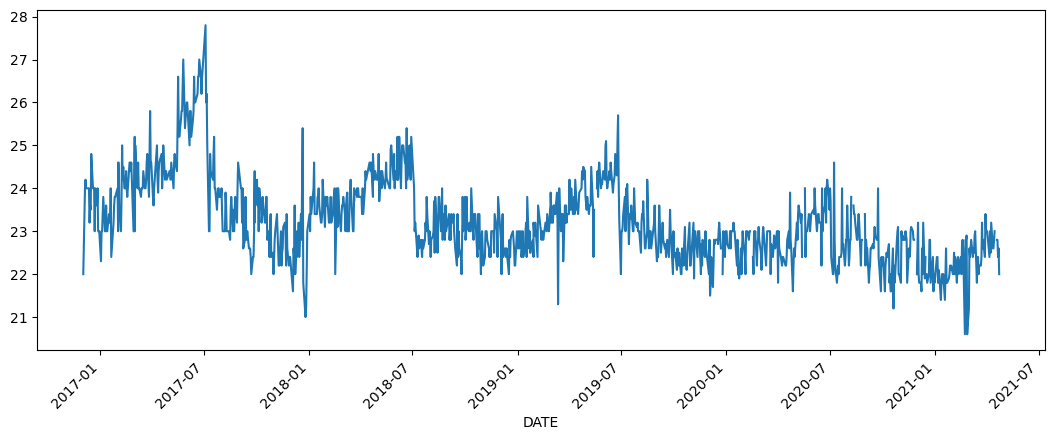

In [100]:
import matplotlib.pyplot as plt
clean_df_photon.loc[:,'Temp(°C)'].plot(rot=45, figsize=(13,5))
plt.show()

#### Exercice
En prenant exemple sur le code précédent,
- Afficher l'évolution des écarts des photons du X6 et X23 MV

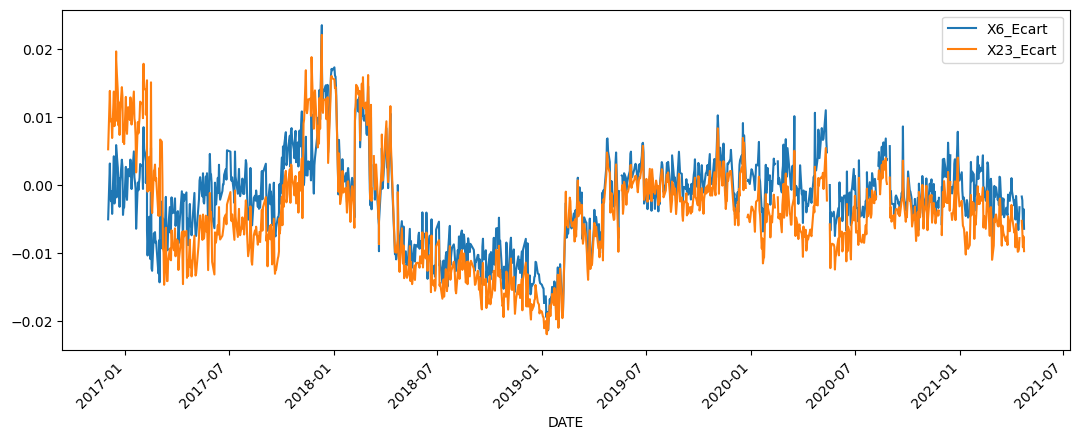

In [106]:
# votre code ici
clean_df_photon.filter(regex='X\d+_E.*').plot(rot=45, figsize=(13,5))
plt.show()

In [103]:
# clean_df_photon.loc[:,['X6_Ecart', 'X23_Ecart']].plot()
clean_df_photon.filter(['X6_Ecart', 'X23_Ecart'])

,X6_Ecart,X23_Ecart
DATE,,
2016-12-02,-0.005035,0.005244
2016-12-05,0.003163,0.013818
2016-12-06,-0.001391,0.009922
2016-12-07,-0.002379,0.009323
2016-12-08,-0.000896,0.009626
...,...,...
2021-04-19,-0.001686,-0.005255
2021-04-20,-0.002242,-0.006740
2021-04-21,-0.005595,-0.009133


#### Exercice

- Déterminer la moyenne du débit de référence du *X6 MV* sur l'ensemble des années de mesures
- Afficher la sur le graphique précédent.

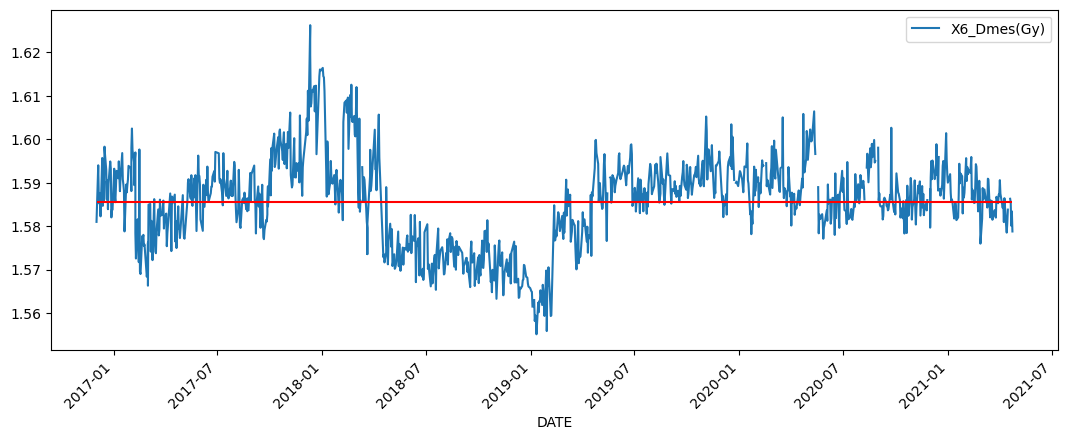

In [36]:
import matplotlib.pyplot as plt
# votre code
mean_6MV = clean_df_photon['X6_Dmes(Gy)'].mean()
clean_df_photon.loc[:,['X6_Dmes(Gy)']].plot(rot=45, figsize=(13,5))
plt.hlines(mean_6MV, xmin=clean_df_photon.index.min(), xmax=clean_df_photon.index.max(), color='r')
plt.show()

Afficher les débits de référence pour 6 et 23 MV sur le même graphique à l'aide de **pandas**.

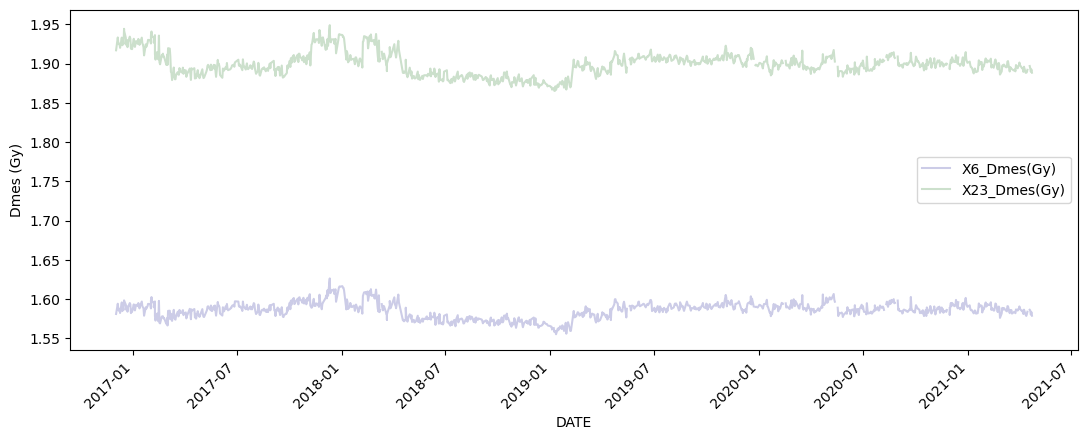

In [37]:
# votre code ici
ax = clean_df_photon.loc[:,['X6_Dmes(Gy)','X23_Dmes(Gy)']].plot(rot=45, figsize=(13,5), label="X 6 MV", alpha=0.2, color=['darkblue', 'darkgreen']);
ax.set_ylabel('Dmes (Gy)')
plt.show()

## Date et pandas

Jouons un peu avec les dates à l'aide de **pandas**.

La méthode `.resample()` permet l'aggrégation de *séries temporelles* en considérant différentes fonctions telles que la moyenne, la médiane, la somme, etc.


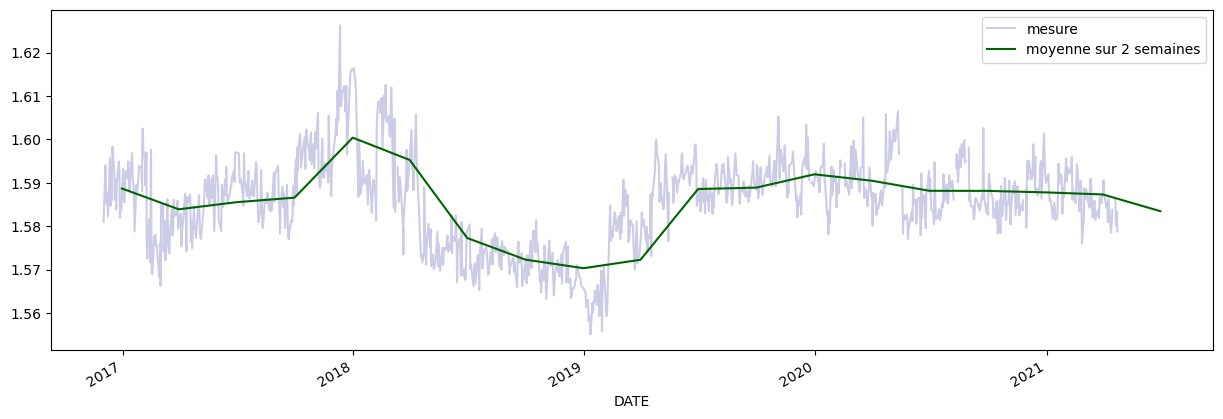

In [110]:
# votre code ici
ax = clean_df_photon.loc[:,'X6_Dmes(Gy)'].plot(color='darkblue', alpha=0.2, label='mesure')
clean_df_photon.resample('3M',).mean(numeric_only=True).loc[:,'X6_Dmes(Gy)'].plot(color='darkgreen', 
                                                                     label='moyenne sur 2 semaines', ax=ax,
                                                                     figsize=(15,5))
plt.legend()
plt.show()

## Opérations sur les chaines de caractères

Grâce à la méthode `.info()`, on connait le type de données que la colonne `Opé.` contient: *des chaines de caractères*.

In [39]:
clean_df_photon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2016-12-02 to 2021-04-23
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           1092 non-null   datetime64[ns]
 1   Opé.           1079 non-null   object        
 2   Temp(°C)       1078 non-null   float64       
 3   Pression(hPa)  1079 non-null   float64       
 4   KT,P           1077 non-null   float64       
 5   X6_Dmes(Gy)    1075 non-null   float64       
 6   X6_Ecart       1075 non-null   float64       
 7   X23_Dmes(Gy)   1076 non-null   float64       
 8   X23_Ecart      1076 non-null   float64       
 9   E6_Dmes(Gy)    582 non-null    float64       
 10  E6_Ecart       582 non-null    float64       
 11  E9_Dmes(Gy)    581 non-null    float64       
 12  E9_Ecart       581 non-null    float64       
 13  E12_Dmes(Gy)   549 non-null    float64       
 14  E12_Ecart      552 non-null    float64       
 15  E15

**Pandas** possède des méthodes très éfficaces car vectorisées pour le traitement de ces chaînes. Ces méthodes sont accessibles à l'aide de l'attribut `.str` apposé à la colonne. Par exemple: `.str.lower()` permet de mettre en lettres minuscules la valeur de la chaine placé avant l'attribut.

In [112]:
clean_df_photon['Operateur'].str.lower().head(3)

DATE
2016-12-02     cg
2016-12-05    dap
2016-12-06     ap
Name: Operateur, dtype: object

Parmi les 1074 lignes, quels sont les différents opérateurs qui ont réalisé les contrôles de qualité ?

La méthode `.unique()` de la `Serie` (*l'équivalent d'un array 1D sous pandas*) permet d'avoir cette information.

In [41]:
clean_df_photon['Opé.'].unique()

array(['CG', 'DAP', 'AP', 'JD', 'YS', 'JD-AP-YS', 'AP-YS', 'SCH/DAP',
       'CLL', 'CG-TC', 'DAP-BF', 'BF', 'BF-TC', 'MV', 'CG-JD', 'DP',
       'JD-CLL', 'TC-BF', 'BF_TC', 'TC', 'CG TC', 'YS-DP', 'CG/SCH',
       'SCH', 'CLL-HL', 'AP-HL', 'HL-CG', 'HL', 'HL-TC', 'CD', 'BF-VP',
       'HL-AP', 'YS-HL', 'TC-YS', 'DP-HL', 'DP-BF', 'AP-HL-TC',
       'AP-HL-CG', 'AP-AD', 'HL-AO', 'AD OP', 'AD', 'AD-OP', 'AD-PO',
       'AD CG', 'PO', 'PO-AD', 'HL AP', 'PO CG', 'AD-HL', 'HL CLL', 'AM',
       'AD-BF', 'GD', 'HL CG', 'CG OB', 'CL OB', 'HL OB', 'OB', nan,
       'JS HL', 'MLG OB', 'JS', 'JS MLG', 'MLG', 'JS OB', 'JS CLL',
       'HL OB JS MLG', 'HL JS', 'OB HL', 'SC MLG', 'JS PO', 'JS ALM',
       'BG OB', 'ALM', 'HL TR', 'OB TR', 'CG DA', 'DA CG', 'TR CG',
       'HL DA', 'TR', 'DA', 'DA TR HL', ' CG', 'HL OB TR', ' HL CG',
       'DA TR'], dtype=object)

On observe que les mesures ont été réalisées avec un seul, deux et parfois trois opérateurs. On remarque aussi que les personnes qui ont rempli la feuille n'not pas respecté la même convention de nommage pour séparer les initiales des opérateurs (tantôt des espaces, tantôt des tirets). On observe une personne anonyme (`'**'`). 

Dans un premier temps, admettons que je souhaite conserver uniquement le premier opérateur pour simplifier le traitement.
- Quelle(s) méthode(s) de l'attribut `str` de la serie `Opé.` utiliseriez-vous ?
- Combien y-a-t-il d'opérateurs différents ?

In [113]:
# votre code ici
clean_df_photon['first_op'] = clean_df_photon['Operateur'].str.replace("/", ' ').str.replace("-", ' ').str.replace("_", ' ').str.slice(0,3).str.strip()
nb_op = len(clean_df_photon['first_op'].unique())
print(f'Il y a {nb_op} operateurs différents.')

Il y a 27 operateurs différents.


## Opérations de regroupement de données

Il est facile de calculer des informations regroupant plusieurs données (somme, moyenne, etc) en conditionnant le calcul sur une ou plusieurs informations.
Des exemples d'utilisation pourraient être :
- Combien de mesures chaque opérateur a-t-il réalisé ?
- Est-ce que les mesures de débit de référence sont différents en moyenne pour les utilisateurs ?

In [43]:
df_top_realises = (clean_df_photon.groupby('first_op')[['X6_Dmes(Gy)']].count()).sort_values(by='X6_Dmes(Gy)',
                                                                                 ascending=False).T
df_top_realises

first_op,HL,OB,CG,BF,AD,TC,YS,JS,MLG,PO,AP,TR,DA,DP,MV,JD,DAP,SCH,CLL,AM,ALM,CL,CD,SC,BG,GD
X6_Dmes(Gy),224,123,120,98,82,62,55,53,42,40,36,29,20,20,16,12,9,8,8,5,4,2,1,1,1,1


In [44]:
clean_df_photon.groupby('first_op')[['X6_Dmes(Gy)','X23_Dmes(Gy)']].mean().T

first_op,AD,ALM,AM,AP,BF,BG,CD,CG,CL,CLL,DA,DAP,DP,GD,HL,JD,JS,MLG,MV,OB,PO,SC,SCH,TC,TR,YS
X6_Dmes(Gy),1.577864,1.589579,1.574024,1.584919,1.584282,1.589374,1.589206,1.588269,1.565796,1.585688,1.588343,1.588866,1.589481,1.573513,1.585573,1.586014,1.587738,1.586436,1.586104,1.587460,1.575359,1.587503,1.585551,1.592119,1.586843,1.587528
X23_Dmes(Gy),1.890269,1.899009,1.881396,1.898158,1.897187,1.897215,1.897687,1.901103,1.877123,1.898951,1.901787,1.926307,1.906531,1.880648,1.897385,1.918363,1.901557,1.900319,1.907519,1.899162,1.886137,1.900524,1.902686,1.907662,1.898235,1.903294


In [45]:
clean_df_photon.groupby('first_op')[['X6_Dmes(Gy)','X23_Dmes(Gy)']].aggregate(['mean','std']).T

first_op                 AD       ALM        AM        AP        BF        BG  \
X6_Dmes(Gy)  mean  1.577864  1.589579  1.574024  1.584919  1.584282  1.589374   
             std   0.012938  0.005244  0.006445  0.011889  0.012080       NaN   
X23_Dmes(Gy) mean  1.890269  1.899009  1.881396  1.898158  1.897187  1.897215   
             std   0.018613  0.007492  0.006191  0.018503  0.017753       NaN   

first_op                 CD        CG        CL       CLL        DA       DAP  \
X6_Dmes(Gy)  mean  1.589206  1.588269  1.565796  1.585688  1.588343  1.588866   
             std        NaN  0.008577  0.001012  0.005835  0.004655  0.004345   
X23_Dmes(Gy) mean  1.897687  1.901103  1.877123  1.898951  1.901787  1.926307   
             std        NaN  0.012541  0.001498  0.014909  0.005407  0.005299   

first_op                 DP        GD        HL        JD        JS       MLG  \
X6_Dmes(Gy)  mean  1.589481  1.573513  1.585573  1.586014  1.587738  1.586436   
             std   0.005208       NaN  0.009205  0.007957  0.006528  0.007806   
X23_Dmes(Gy) mean  1.906531  1.880648  1.897385  1.918363  1.901557  1.900319   
             std   0.017772       NaN  0.011780  0.017166  0.008150  0.008743   

first_op                 MV        OB        PO        SC       SCH        TC  \
X6_Dmes(Gy)  mean  1.586104  1.587460  1.575359  1.587503  1.585551  1.592119   
             std   0.012493  0.007262  0.010053       NaN  0.003843  0.013102   
X23_Dmes(Gy) mean  1.907519  1.899162  1.886137  1.900524  1.902686  1.907662   
             std   0.019081  0.007758  0.014175       NaN  0.015360  0.017897   

first_op                 TR        YS  
X6_Dmes(Gy)  mean  1.586843  1.587528  
             std   0.005200  0.006445  
X23_Dmes(Gy) mean  1.898235  1.903294  
             std   0.006498  0.016275

Affichez l'évolution temporelle des débits de référence pour les X6 et X23 MV pour les 3 meilleurs réalisateurs du plus grand nombre de controles.

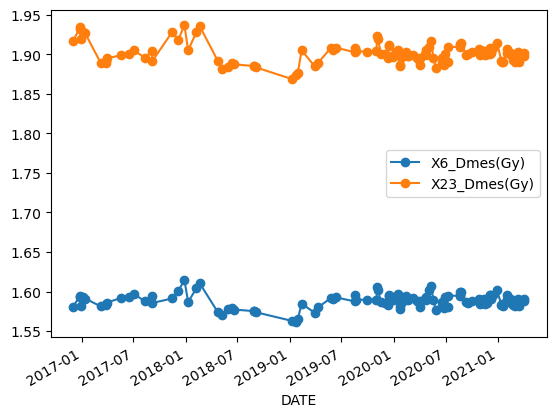

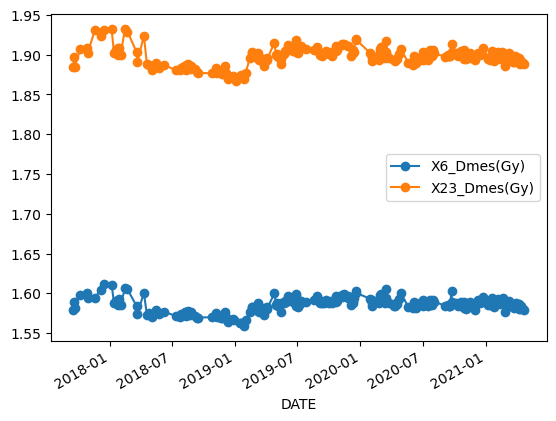

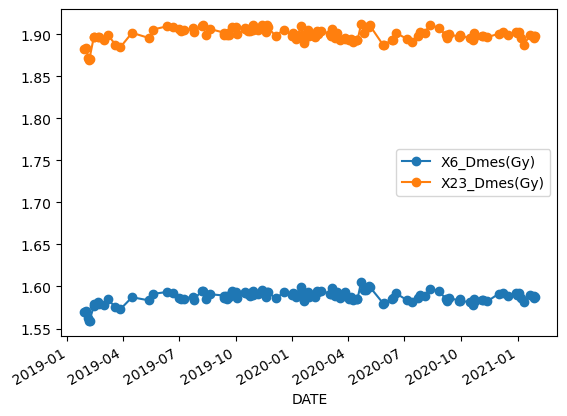

In [46]:
# on ne prend que les operateurs ayant réalisé plus de 100 mesures de débit
# votre code ici
nb_top_realises = 100
top_operator = df_top_realises[df_top_realises > nb_top_realises].dropna(axis=1)
op = list(top_operator.columns)
clean_df_photon.query('first_op in @op').groupby('first_op')[['X6_Dmes(Gy)','X23_Dmes(Gy)']].plot(style='o-')
plt.show()

Afficher sur un graphique les boites à moustaches les écarts des débits de références pour X6 et X23 MV pour les 3 réalisateurs du plus grand nombre de contrôles. 

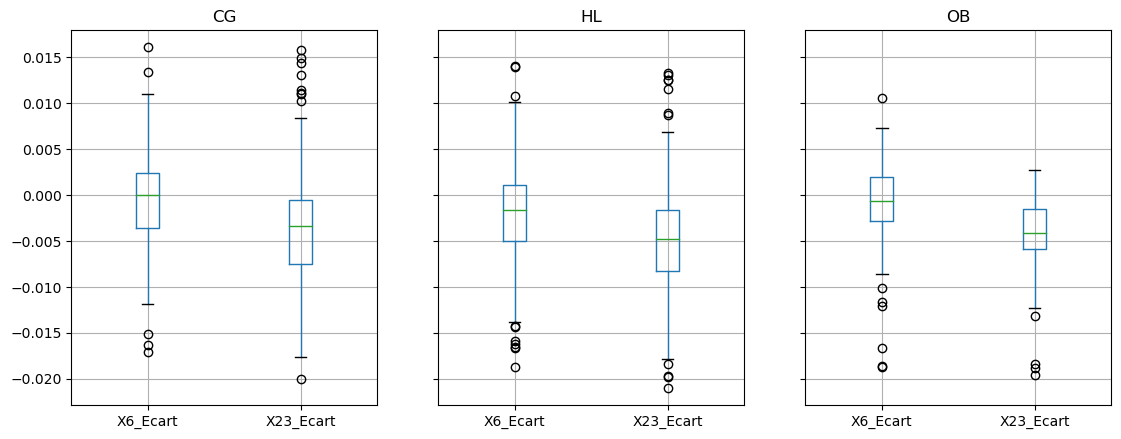

In [66]:
clean_df_photon.loc[:,['first_op','X6_Ecart','X23_Ecart']].query('first_op in @op').groupby('first_op').boxplot(layout=(1,3), figsize=(13,5))
plt.show()

## Exercice
- Créer un script qui reprennent les étapes de lecture du fichier XLS et de nettoyage des données pour arriver à un dataframe prêt à être utiliser pour l'analyse des données.